In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
G=pd.read_csv("D:\DS-Class\project-1\Mini_pro2\Grass_Land.csv")
F=pd.read_csv("D:/DS-Class/project-1/Mini_pro2/forest.csv")


# 1.Temporal Analysis
## Seasonal Trends: Analyze the Date and Year columns to detect patterns in bird sightings across different seasons or years.

In [4]:
F['Date']=pd.to_datetime(F['Date'])
G['Date']=pd.to_datetime(G['Date'])

F['Month']=F['Date'].dt.month
G['Month']=G['Date'].dt.month

In [5]:
def get_season(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    else:
        return 'Autumn'

F['season']=F['Month'].apply(get_season)
G['season']=G['Month'].apply(get_season)


In [6]:
seasonal_forest = F['season'].value_counts()
seasonal_grassland = G['season'].value_counts()
print(seasonal_forest)
print(seasonal_grassland)

season
Summer    6150
Spring    2387
Name: count, dtype: int64
season
Summer    4351
Spring    2474
Name: count, dtype: int64


C:\Users\keert\AppData\Local\Temp\ipykernel_17568\280323666.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_forest.index, y=seasonal_forest.values, palette="coolwarm")


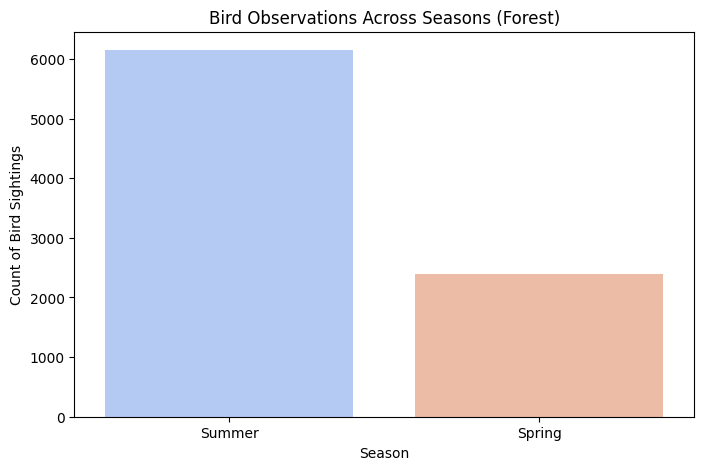

C:\Users\keert\AppData\Local\Temp\ipykernel_17568\280323666.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_grassland.index, y=seasonal_grassland.values, palette="coolwarm")


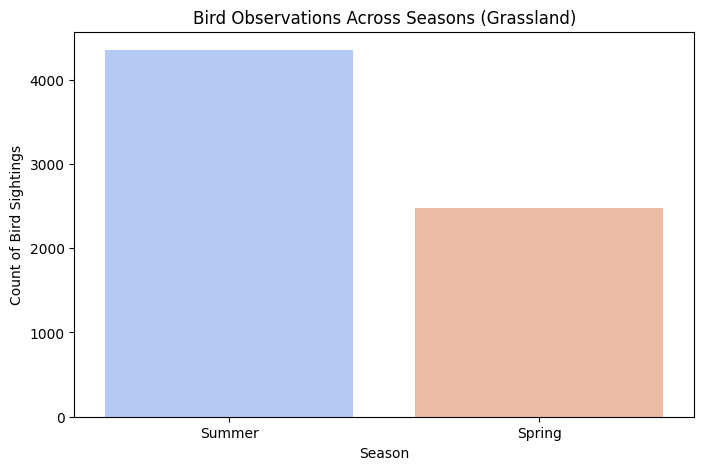

In [7]:
plt.figure(figsize=(8, 5))
sns.barplot(x=seasonal_forest.index, y=seasonal_forest.values, palette="coolwarm")
plt.title("Bird Observations Across Seasons (Forest)")
plt.xlabel("Season")
plt.ylabel("Count of Bird Sightings")
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x=seasonal_grassland.index, y=seasonal_grassland.values, palette="coolwarm")
plt.title("Bird Observations Across Seasons (Grassland)")
plt.xlabel("Season")
plt.ylabel("Count of Bird Sightings")
plt.show()


## Observation Time: Study the Start_Time and End_Time to determine if specific time windows correlate with higher bird activity.

In [8]:
F['Start_Time']=pd.to_datetime(F['Start_Time'],format="%H:%M:%S").dt.hour
F['End_Time']=pd.to_datetime(F['End_Time'],format="%H:%M:%S").dt.hour

G['Start_Time']=pd.to_datetime(G['Start_Time'],format="%H:%M:%S").dt.hour
G['End_Time']=pd.to_datetime(G['End_Time'],format="%H:%M:%S").dt.hour

In [9]:
forest_start_distribution = F["Start_Time"].value_counts().sort_index()
forest_end_distribution = F["End_Time"].value_counts().sort_index()
grassland_start_distribution  = G["Start_Time"].value_counts().sort_index()
grassland_end_distribution = G["End_Time"].value_counts().sort_index()
print(forest_start_distribution.head())
print(forest_end_distribution.head())
print(grassland_start_distribution.head())
print(grassland_end_distribution.head())



Start_Time
5     633
6    2288
7    2329
8    1916
9     978
Name: count, dtype: int64
End_Time
5     315
6    2210
7    2347
8    1974
9    1198
Name: count, dtype: int64
Start_Time
5     654
6    1548
7    1683
8    1276
9    1036
Name: count, dtype: int64
End_Time
5     375
6    1524
7    1719
8    1306
9    1123
Name: count, dtype: int64


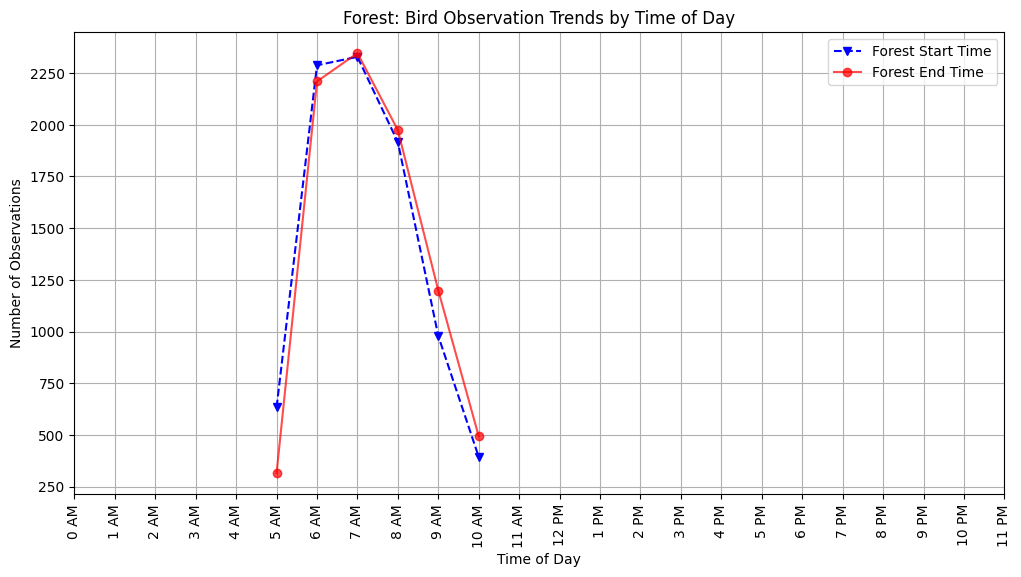

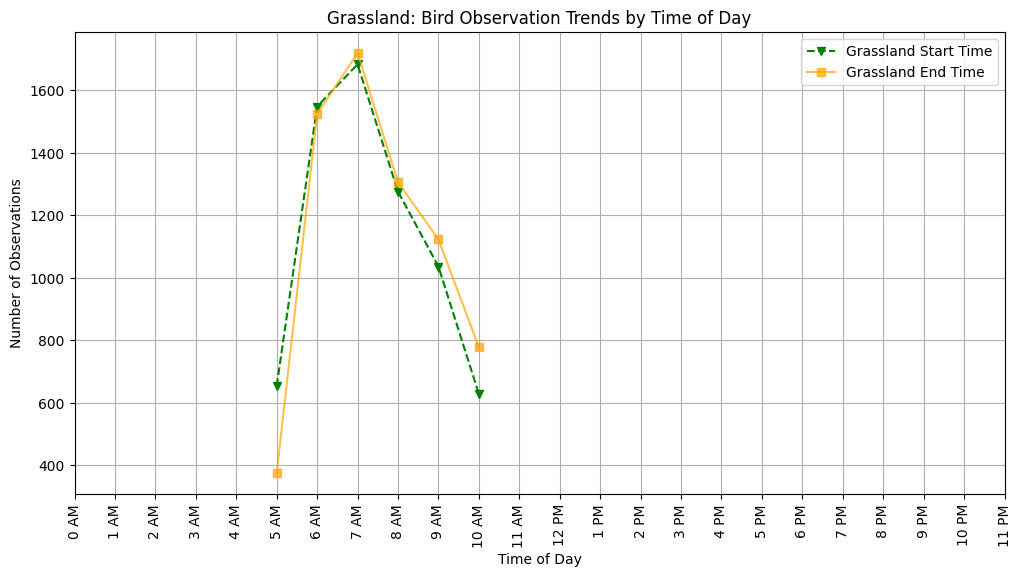

In [10]:

hour_labels = [f"{h} AM" if h < 12 else ("12 PM" if h == 12 else f"{h-12} PM") for h in range(24)]

#Plot for Forest
plt.figure(figsize=(12, 6))
plt.plot(forest_start_distribution.index, forest_start_distribution.values, marker='v', linestyle='--', color='b', label="Forest Start Time")
plt.plot(forest_end_distribution.index, forest_end_distribution.values, marker='o', linestyle='-', color='r', label="Forest End Time", alpha=0.7)

plt.xticks(range(24), hour_labels, rotation=90)  # Show 24-hour format as AM/PM
plt.title("Forest: Bird Observation Trends by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Observations")
plt.legend()
plt.grid(True)
plt.show()

#Plot for Grassland
plt.figure(figsize=(12, 6))
plt.plot(grassland_start_distribution.index, grassland_start_distribution.values, marker='v', linestyle='--', color='g', label="Grassland Start Time")
plt.plot(grassland_end_distribution.index, grassland_end_distribution.values, marker='s', linestyle='-', color='orange', label="Grassland End Time", alpha=0.7)

plt.xticks(range(24), hour_labels, rotation=90)  # Show 24-hour format as AM/PM
plt.title("Grassland: Bird Observation Trends by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Observations")
plt.legend()
plt.grid(True)
plt.show()


# 2.Spatial Analysis
## Location Insights: Group data by Location_Type (e.g., Grassland) to identify biodiversity hotspots.

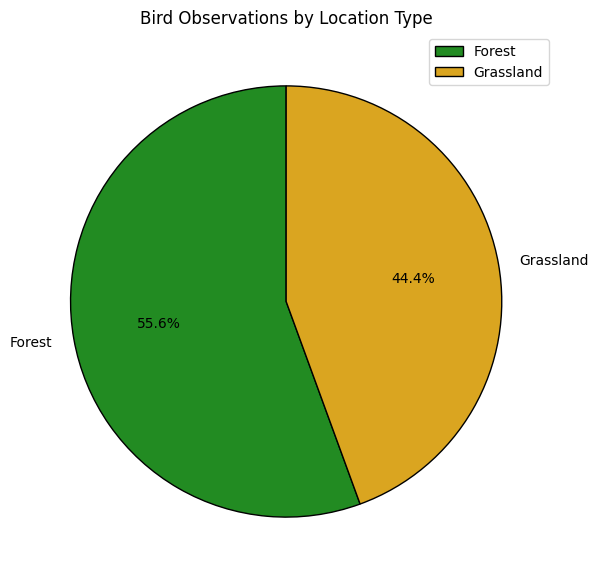

In [11]:
combined_df = pd.concat([F,G])

location_counts = combined_df["Location_Type"].value_counts()

colors = ["forestgreen", "goldenrod"]  
plt.figure(figsize=(7, 7))
plt.pie(location_counts.values, labels=location_counts.index, 
        autopct='%1.1f%%', colors=colors, startangle=90, 
        wedgeprops={'edgecolor': 'black'},
        )
plt.title("Bird Observations by Location Type")
plt.legend()
plt.show()


## Plot-Level Analysis: Compare observations across different Plot_Name to see which plots attract more species or specific kinds of birds.

C:\Users\keert\AppData\Local\Temp\ipykernel_17568\795694631.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=forest_top_plots.index, y=forest_top_plots.values, palette="coolwarm")


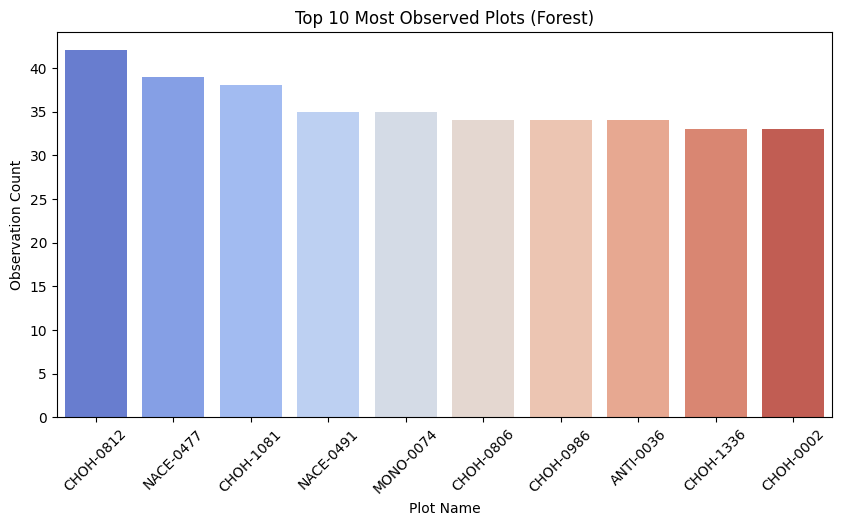

C:\Users\keert\AppData\Local\Temp\ipykernel_17568\795694631.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grassland_top_plots.index, y=grassland_top_plots.values, palette="viridis")


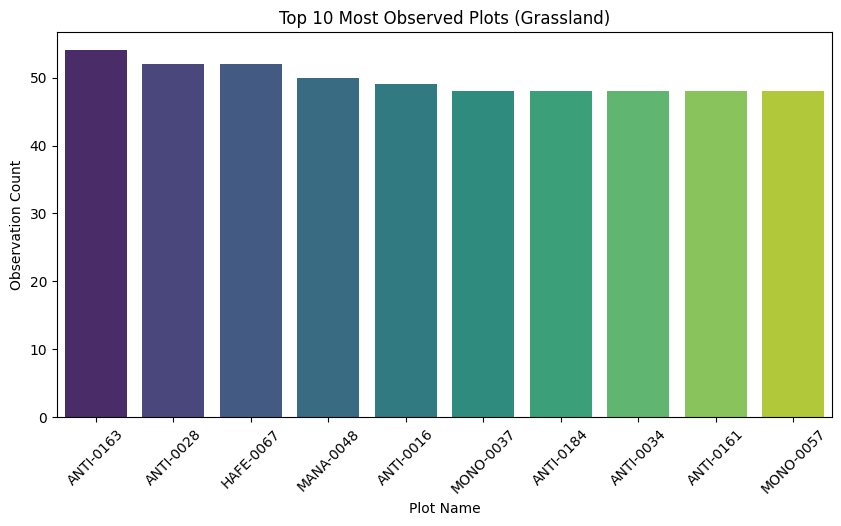

In [12]:
top_n = 10
forest_top_plots = F['Plot_Name'].value_counts().nlargest(top_n)
grassland_top_plots = G['Plot_Name'].value_counts().nlargest(top_n)
# Plot for Forest
plt.figure(figsize=(10, 5))
sns.barplot(x=forest_top_plots.index, y=forest_top_plots.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 10 Most Observed Plots (Forest)")
plt.xlabel("Plot Name")
plt.ylabel("Observation Count")
plt.show()

# Plot for Grassland
plt.figure(figsize=(10, 5))
sns.barplot(x=grassland_top_plots.index, y=grassland_top_plots.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Most Observed Plots (Grassland)")
plt.xlabel("Plot Name")
plt.ylabel("Observation Count")
plt.show()

# 3. Species Analysis


## Diversity Metrics: Count unique species (Scientific_Name) observed and their distribution across Location_Type.

Total Unique Species Observed: 127


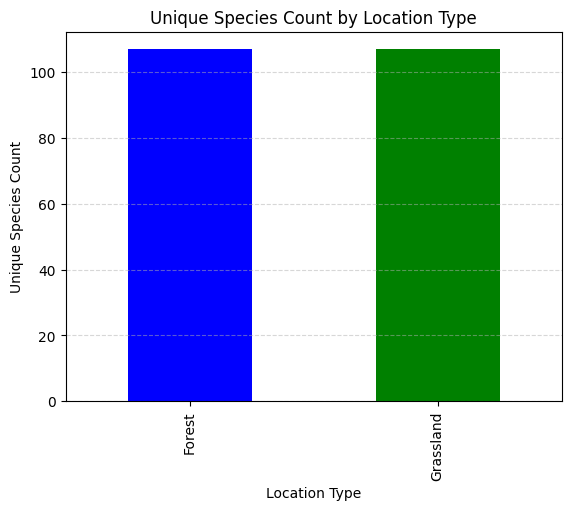

In [13]:
species_count = pd.concat([F, G])['Scientific_Name'].nunique()
print(f"Total Unique Species Observed: {species_count}")

location_species = pd.concat([F, G]).groupby("Location_Type")["Scientific_Name"].nunique()
location_species.plot(kind='bar', color=['blue', 'green'])
plt.title("Unique Species Count by Location Type")
plt.xlabel("Location Type")
plt.ylabel("Unique Species Count")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

## Activity Patterns: Check the Interval_Length and ID_Method columns to identify the most common activity types (e.g., Singing).

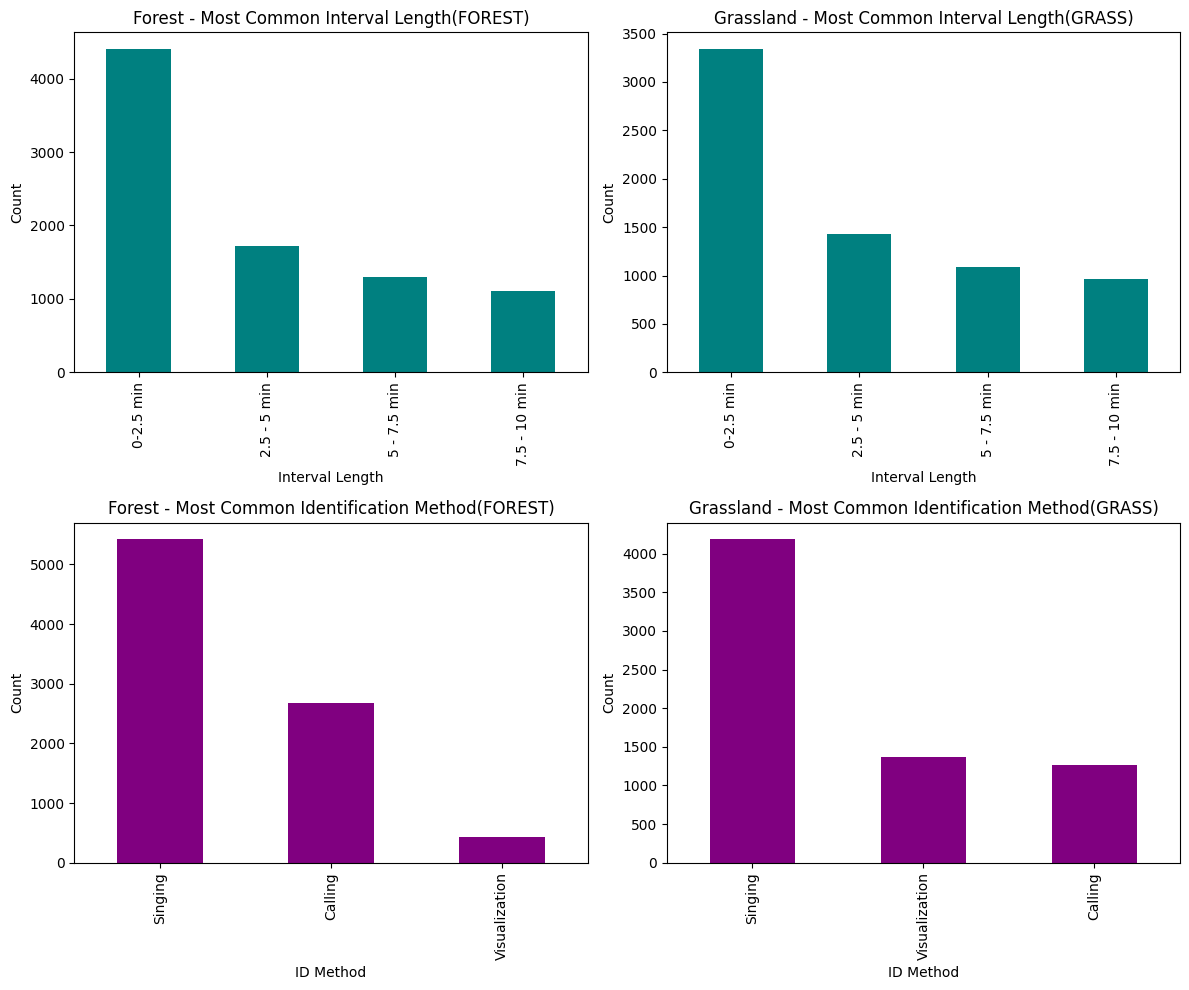

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Forest Interval Length
F['Interval_Length'].value_counts().plot(kind='bar', ax=axes[0, 0], color='teal')
axes[0, 0].set_title("Forest - Most Common Interval Length(FOREST)")
axes[0, 0].set_xlabel("Interval Length")
axes[0, 0].set_ylabel("Count")

# Grassland Interval Length
G['Interval_Length'].value_counts().plot(kind='bar', ax=axes[0, 1], color='teal')
axes[0, 1].set_title("Grassland - Most Common Interval Length(GRASS)")
axes[0, 1].set_xlabel("Interval Length")
axes[0, 1].set_ylabel("Count")

# Forest ID Method
F['ID_Method'].value_counts().plot(kind='bar', ax=axes[1, 0], color='purple')
axes[1, 0].set_title("Forest - Most Common Identification Method(FOREST)")
axes[1, 0].set_xlabel("ID Method")
axes[1, 0].set_ylabel("Count")

# Grassland ID Method
G['ID_Method'].value_counts().plot(kind='bar', ax=axes[1, 1], color='purple')
axes[1, 1].set_title("Grassland - Most Common Identification Method(GRASS)")
axes[1, 1].set_xlabel("ID Method")
axes[1, 1].set_ylabel("Count")

plt.tight_layout()
plt.show()


## Sex Ratio: Analyze the Sex column to understand the male-to-female ratio for different species.

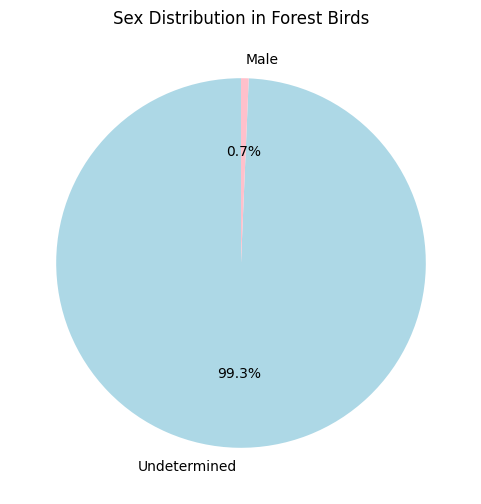

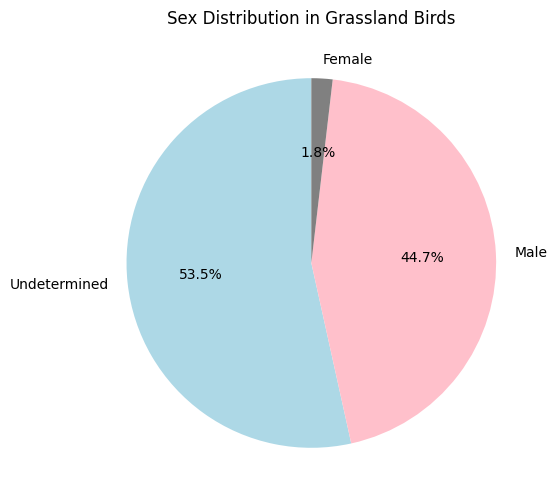

In [16]:
# Forest Sex Ratio
forest_sex_ratio = F['Sex'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(forest_sex_ratio, labels=forest_sex_ratio.index, autopct='%1.1f%%', 
        colors=['lightblue', 'pink', 'gray'], startangle=90)
plt.title("Sex Distribution in Forest Birds")
plt.show()

# Grassland Sex Ratio
grassland_sex_ratio = G['Sex'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(grassland_sex_ratio, labels=grassland_sex_ratio.index, autopct='%1.1f%%', 
        colors=['lightblue', 'pink', 'gray'], startangle=90)
plt.title("Sex Distribution in Grassland Birds")
plt.show()


## 4. Environmental Conditions

## Weather Correlation: Explore how Temperature, Humidity, Sky, and Wind impact observations, such as the number of birds or their distances.

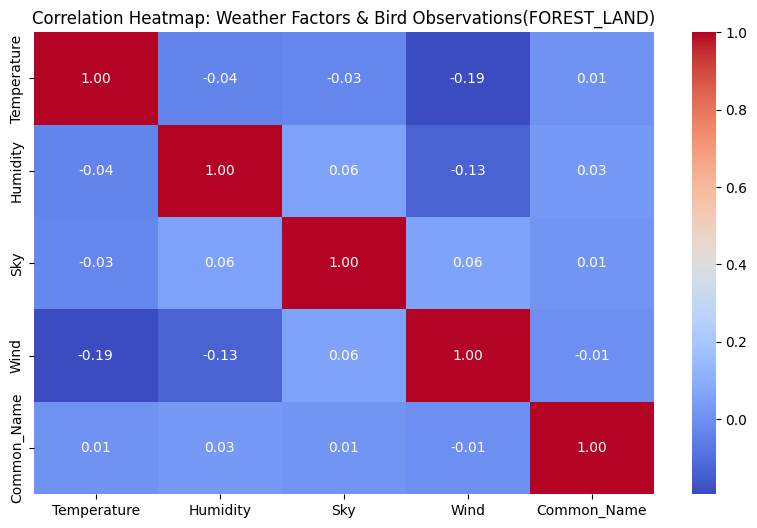

In [36]:
label_enc = LabelEncoder()
F['Common_Name'] = label_enc.fit_transform(F['Common_Name'])
F['Sky'] = label_enc.fit_transform(F['Sky'])
F['Wind'] = label_enc.fit_transform(F['Wind'])

numeric_cols = ['Temperature', 'Humidity', 'Sky', 'Wind', 'Common_Name', ]

plt.figure(figsize=(10, 6))
sns.heatmap(F[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Weather Factors & Bird Observations(FOREST_LAND)")
plt.show()


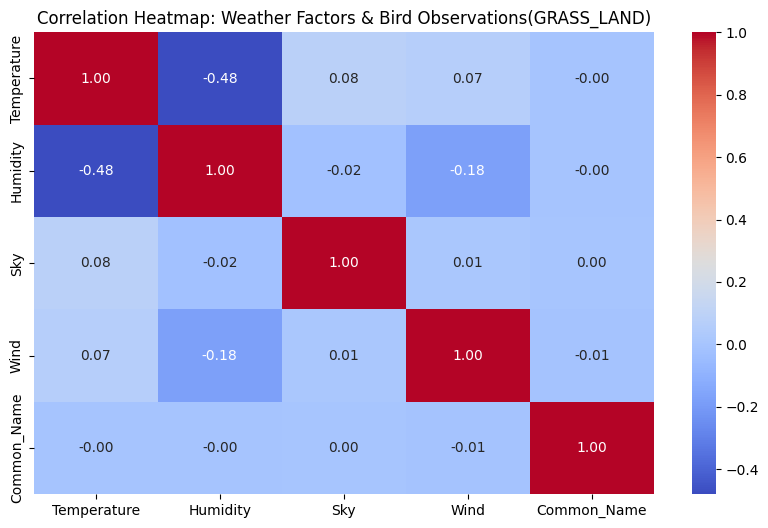

In [35]:
label_enc = LabelEncoder()
G['Common_Name'] = label_enc.fit_transform(G['Common_Name'])
G['Sky'] = label_enc.fit_transform(G['Sky'])
G['Wind'] = label_enc.fit_transform(G['Wind'])

numeric_cols = ['Temperature', 'Humidity', 'Sky', 'Wind', 'Common_Name', ]

plt.figure(figsize=(10, 6))
sns.heatmap(G[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Weather Factors & Bird Observations(GRASS_LAND)")
plt.show()

## Disturbance Effect: Assess the impact of Disturbance (e.g., slight effect) on bird sightings.

C:\Users\keert\AppData\Local\Temp\ipykernel_17568\835917913.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=F, x="Disturbance", order=F["Disturbance"].value_counts().index, palette="viridis")


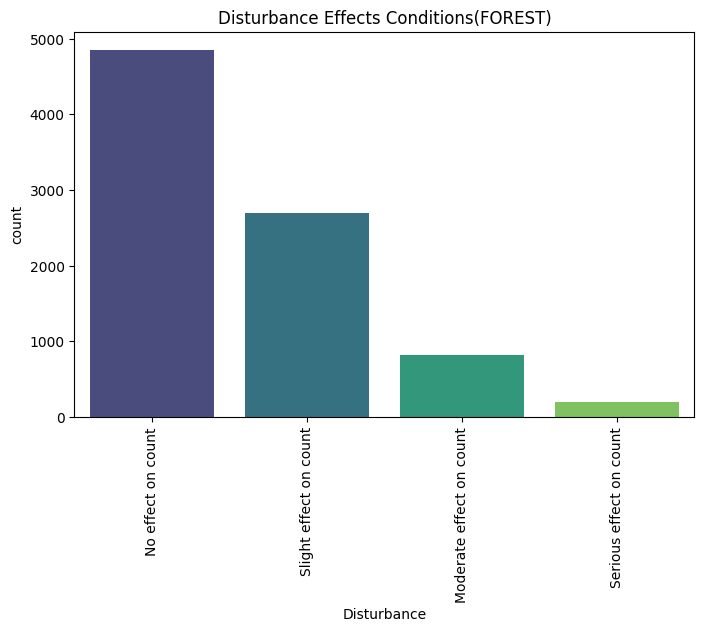

In [37]:

plt.figure(figsize=(8, 5))
sns.countplot(data=F, x="Disturbance", order=F["Disturbance"].value_counts().index, palette="viridis")
plt.title("Disturbance Effects Conditions(FOREST)")
plt.xticks(rotation=90)
plt.show()

C:\Users\keert\AppData\Local\Temp\ipykernel_17568\2369500944.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=G, x="Disturbance", order=G["Disturbance"].value_counts().index, palette="viridis")


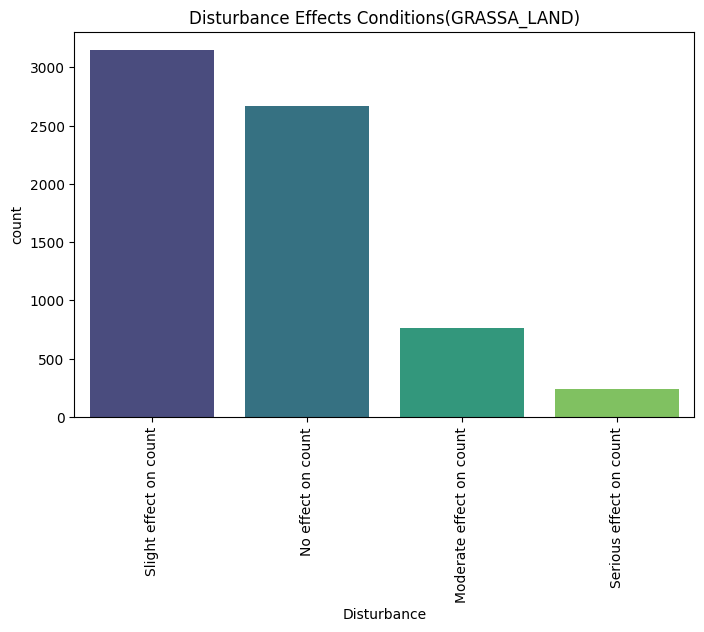

In [38]:

plt.figure(figsize=(8, 5))
sns.countplot(data=G, x="Disturbance", order=G["Disturbance"].value_counts().index, palette="viridis")
plt.title("Disturbance Effects Conditions(GRASSA_LAND)")
plt.xticks(rotation=90)
plt.show()

C:\Users\keert\AppData\Local\Temp\ipykernel_17568\1146665306.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=F, x="Distance", order=F["Distance"].value_counts().index, palette="viridis")


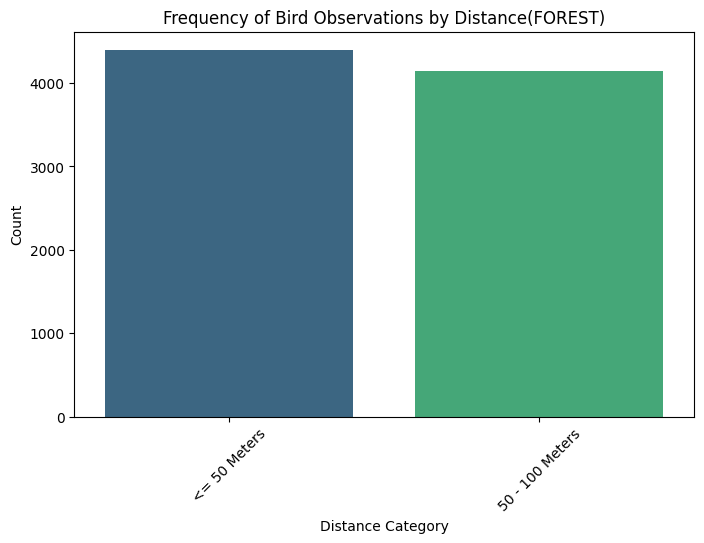

In [39]:
plt.figure(figsize=(8, 5))
sns.countplot(data=F, x="Distance", order=F["Distance"].value_counts().index, palette="viridis")
plt.title("Frequency of Bird Observations by Distance(FOREST)")
plt.xlabel("Distance Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()



C:\Users\keert\AppData\Local\Temp\ipykernel_17568\2015457759.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=G, x="Distance", order=G["Distance"].value_counts().index, palette="viridis")


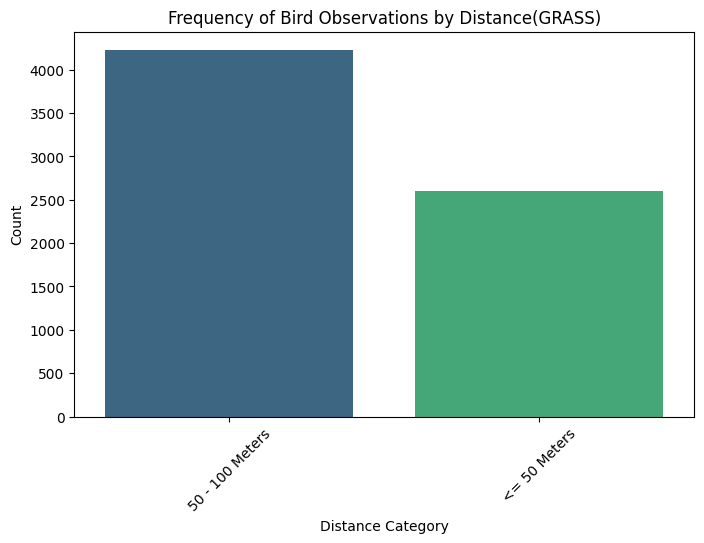

In [40]:
plt.figure(figsize=(8, 5))
sns.countplot(data=G, x="Distance", order=G["Distance"].value_counts().index, palette="viridis")
plt.title("Frequency of Bird Observations by Distance(GRASS)")
plt.xlabel("Distance Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


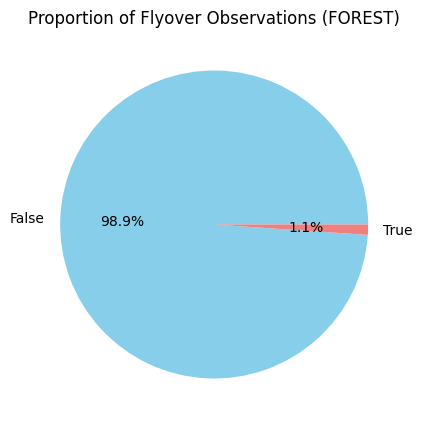

In [41]:
plt.figure(figsize=(5, 5))
F["Flyover_Observed"].value_counts().plot.pie(autopct="%1.1f%%", colors=["skyblue", "lightcoral"])
plt.title("Proportion of Flyover Observations (FOREST)")
plt.ylabel("")  # Hide y-label for better visualization
plt.show()


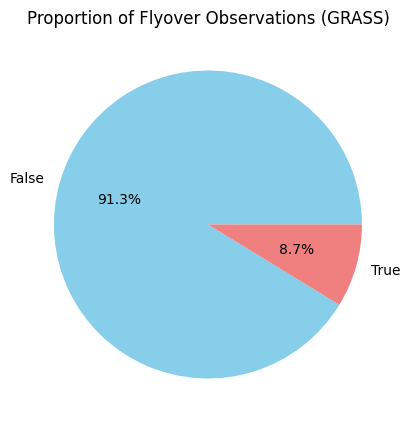

In [42]:
plt.figure(figsize=(5, 5))
G["Flyover_Observed"].value_counts().plot.pie(autopct="%1.1f%%", colors=["skyblue", "lightcoral"])
plt.title("Proportion of Flyover Observations (GRASS)")
plt.ylabel("")  # Hide y-label for better visualization
plt.show()

C:\Users\keert\AppData\Local\Temp\ipykernel_17568\4149667861.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=F, x="Observer", order=F["Observer"].value_counts().index, palette="coolwarm")


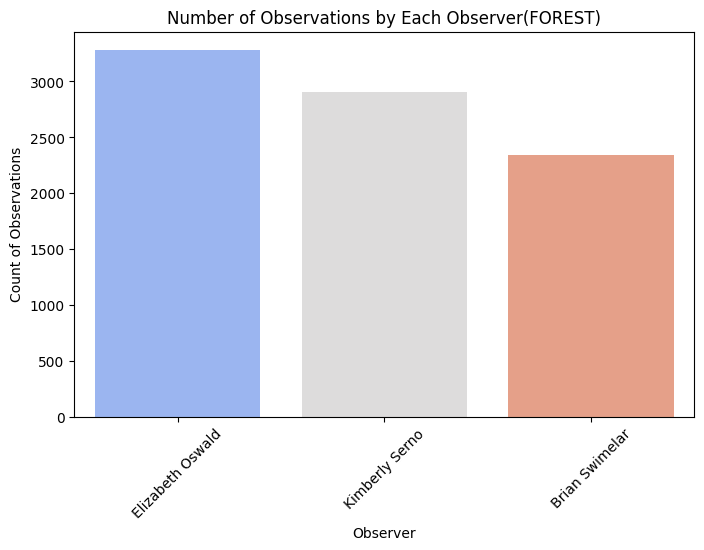

In [43]:

plt.figure(figsize=(8, 5))
sns.countplot(data=F, x="Observer", order=F["Observer"].value_counts().index, palette="coolwarm")
plt.title("Number of Observations by Each Observer(FOREST)")
plt.xlabel("Observer")
plt.ylabel("Count of Observations")
plt.xticks(rotation=45)
plt.show()


C:\Users\keert\AppData\Local\Temp\ipykernel_17568\1024659373.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=G, x="Observer", order=G["Observer"].value_counts().index, palette="coolwarm")


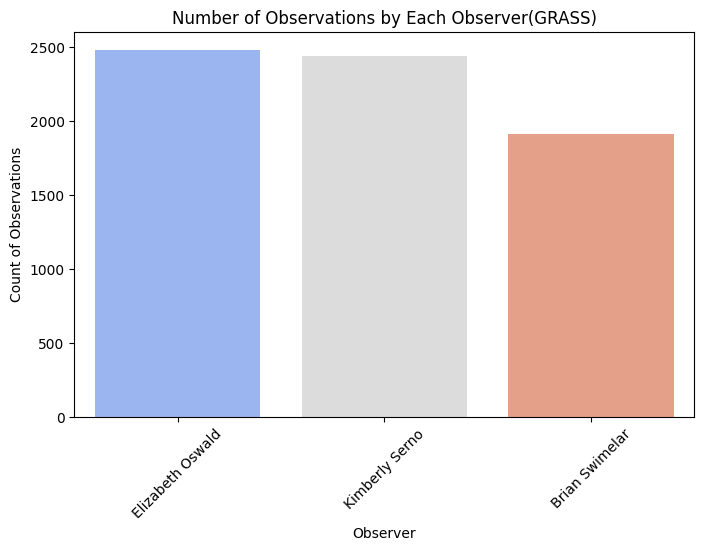

In [45]:
plt.figure(figsize=(8, 5))
sns.countplot(data=G, x="Observer", order=G["Observer"].value_counts().index, palette="coolwarm")
plt.title("Number of Observations by Each Observer(GRASS)")
plt.xlabel("Observer")
plt.ylabel("Count of Observations")
plt.xticks(rotation=45)
plt.show()

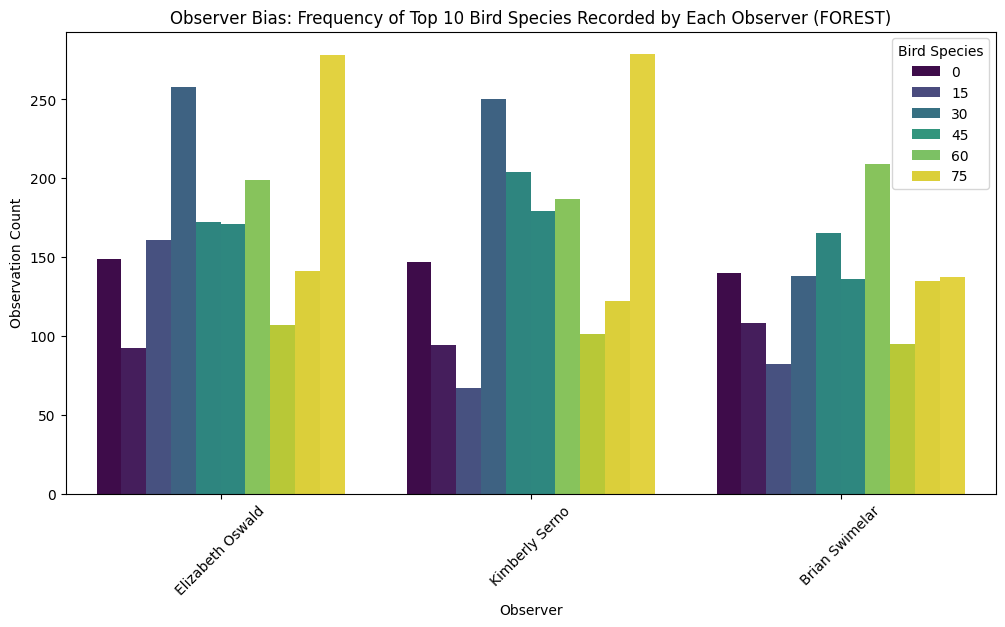

In [46]:

# Get the top 10 most observed bird species
top_species = F["Common_Name"].value_counts().head(10).index

# Filter dataset to include only these species
filtered_df = F[F["Common_Name"].isin(top_species)]

# Plot the observer bias for these top species
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x="Observer", hue="Common_Name", palette="viridis")

# Formatting the plot
plt.title("Observer Bias: Frequency of Top 10 Bird Species Recorded by Each Observer (FOREST)")
plt.xlabel("Observer")
plt.ylabel("Observation Count")
plt.xticks(rotation=45)
plt.legend(title="Bird Species", bbox_to_anchor=(1, 1))
plt.show()


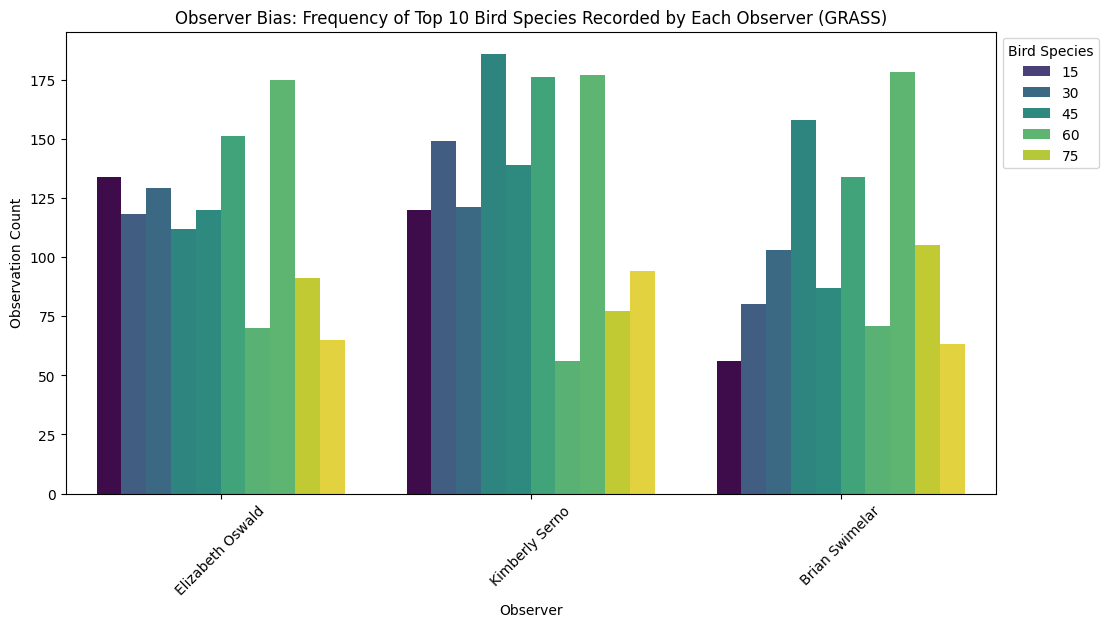

In [47]:

# Get the top 10 most observed bird species
top_species = G["Common_Name"].value_counts().head(10).index

# Filter dataset to include only these species
filtered_df = G[G["Common_Name"].isin(top_species)]

# Plot the observer bias for these top species
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x="Observer", hue="Common_Name", palette="viridis")

# Formatting the plot
plt.title("Observer Bias: Frequency of Top 10 Bird Species Recorded by Each Observer (GRASS)")
plt.xlabel("Observer")
plt.ylabel("Observation Count")
plt.xticks(rotation=45)
plt.legend(title="Bird Species", bbox_to_anchor=(1, 1))
plt.show()

C:\Users\keert\AppData\Local\Temp\ipykernel_17568\3535097425.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=visit_species_count, x="Visit", y="Unique Species Count", palette="magma")


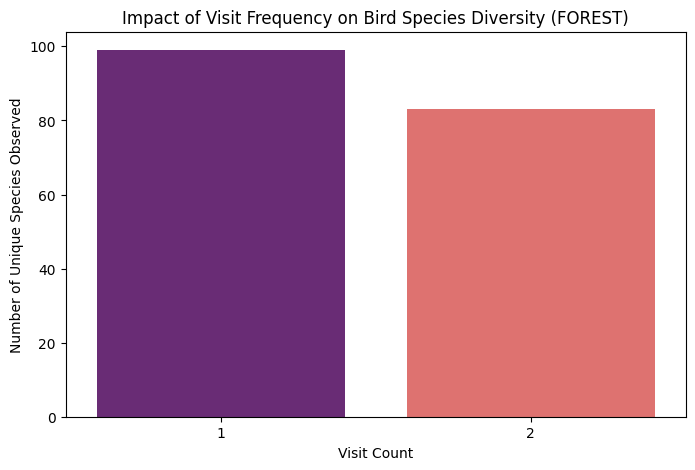

In [48]:

# Count unique species observed per Visit
visit_species_count = F.groupby("Visit")["Common_Name"].nunique().reset_index()

# Rename for clarity
visit_species_count.columns = ["Visit", "Unique Species Count"]

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=visit_species_count, x="Visit", y="Unique Species Count", palette="magma")

# Formatting
plt.title("Impact of Visit Frequency on Bird Species Diversity (FOREST)")
plt.xlabel("Visit Count")
plt.ylabel("Number of Unique Species Observed")
plt.show()


C:\Users\keert\AppData\Local\Temp\ipykernel_17568\883508357.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=visit_species_count, x="Visit", y="Unique Species Count", palette="magma")


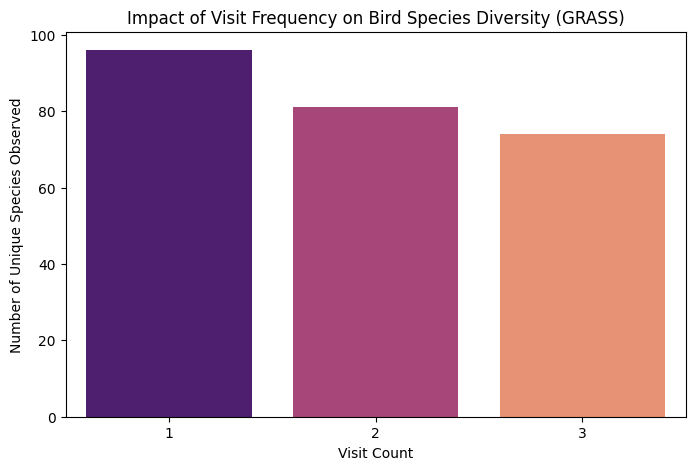

In [49]:

# Count unique species observed per Visit
visit_species_count = G.groupby("Visit")["Common_Name"].nunique().reset_index()

# Rename for clarity
visit_species_count.columns = ["Visit", "Unique Species Count"]

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=visit_species_count, x="Visit", y="Unique Species Count", palette="magma")

# Formatting
plt.title("Impact of Visit Frequency on Bird Species Diversity (GRASS)")
plt.xlabel("Visit Count")
plt.ylabel("Number of Unique Species Observed")
plt.show()

C:\Users\keert\AppData\Local\Temp\ipykernel_17568\2415748436.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=watchlist_counts, x="Status", y="Count", palette="Reds")
C:\Users\keert\AppData\Local\Temp\ipykernel_17568\2415748436.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=stewardship_counts, x="Status", y="Count", palette="Blues")


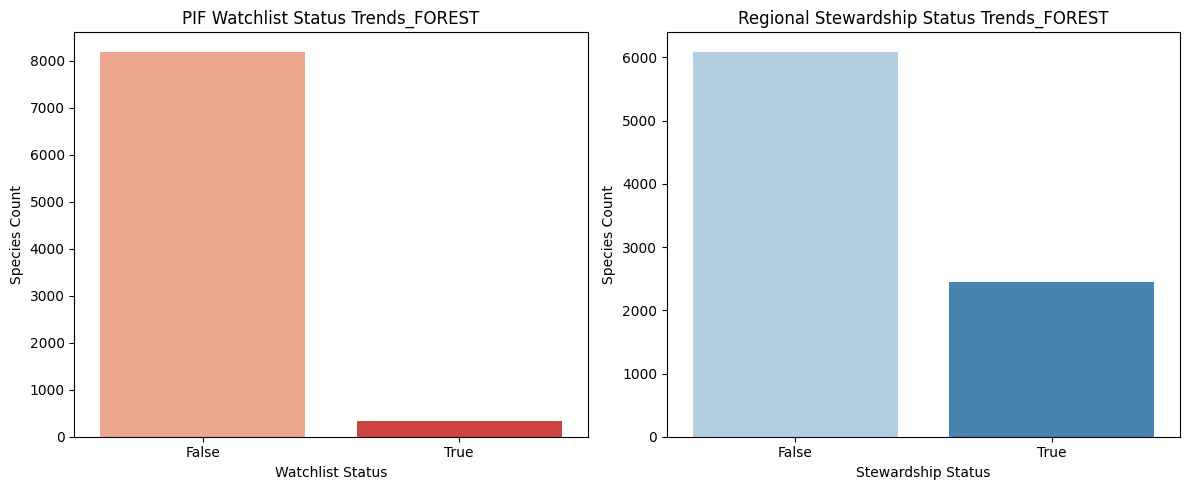

In [50]:
# Count the occurrences of each status in PIF_Watchlist_Status
watchlist_counts = F["PIF_Watchlist_Status"].value_counts().reset_index()
watchlist_counts.columns = ["Status", "Count"]

# Count the occurrences of each status in Regional_Stewardship_Status
stewardship_counts = F["Regional_Stewardship_Status"].value_counts().reset_index()
stewardship_counts.columns = ["Status", "Count"]

# Plot PIF Watchlist Trends
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=watchlist_counts, x="Status", y="Count", palette="Reds")
plt.title("PIF Watchlist Status Trends_FOREST")
plt.xlabel("Watchlist Status")
plt.ylabel("Species Count")

# Plot Regional Stewardship Trends
plt.subplot(1, 2, 2)
sns.barplot(data=stewardship_counts, x="Status", y="Count", palette="Blues")
plt.title("Regional Stewardship Status Trends_FOREST")
plt.xlabel("Stewardship Status")
plt.ylabel("Species Count")

plt.tight_layout()
plt.show()


C:\Users\keert\AppData\Local\Temp\ipykernel_17568\3146160103.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=watchlist_counts, x="Status", y="Count", palette="Reds")
C:\Users\keert\AppData\Local\Temp\ipykernel_17568\3146160103.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=stewardship_counts, x="Status", y="Count", palette="Blues")


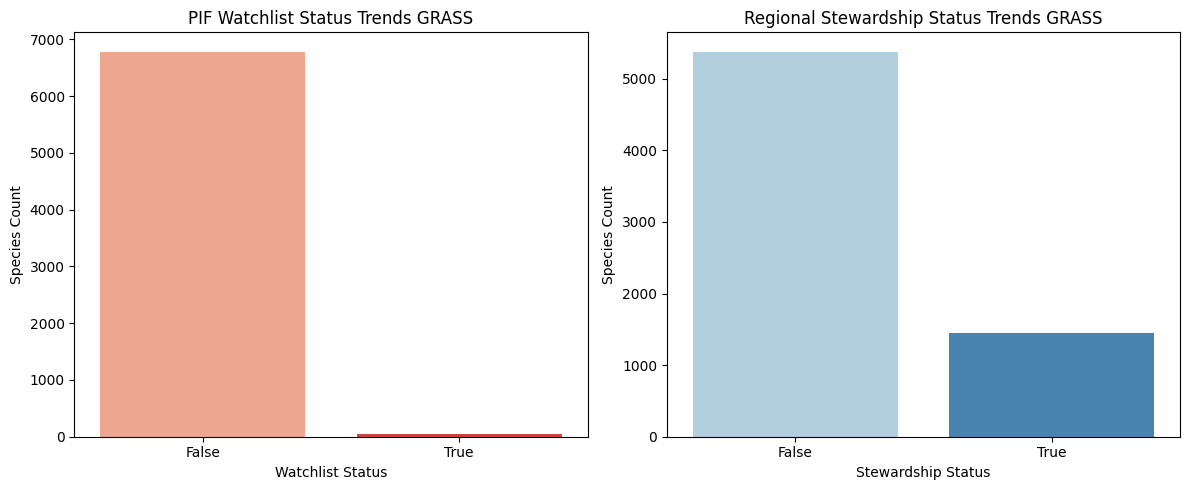

In [51]:
# Count the occurrences of each status in PIF_Watchlist_Status
watchlist_counts = G["PIF_Watchlist_Status"].value_counts().reset_index()
watchlist_counts.columns = ["Status", "Count"]

# Count the occurrences of each status in Regional_Stewardship_Status
stewardship_counts = G["Regional_Stewardship_Status"].value_counts().reset_index()
stewardship_counts.columns = ["Status", "Count"]

# Plot PIF Watchlist Trends
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=watchlist_counts, x="Status", y="Count", palette="Reds")
plt.title("PIF Watchlist Status Trends GRASS")
plt.xlabel("Watchlist Status")
plt.ylabel("Species Count")

# Plot Regional Stewardship Trends
plt.subplot(1, 2, 2)
sns.barplot(data=stewardship_counts, x="Status", y="Count", palette="Blues")
plt.title("Regional Stewardship Status Trends GRASS")
plt.xlabel("Stewardship Status")
plt.ylabel("Species Count")

plt.tight_layout()
plt.show()

C:\Users\keert\AppData\Local\Temp\ipykernel_17568\792376333.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=aou_counts.head(20), x="AOU_Code", y="Count", palette="mako")


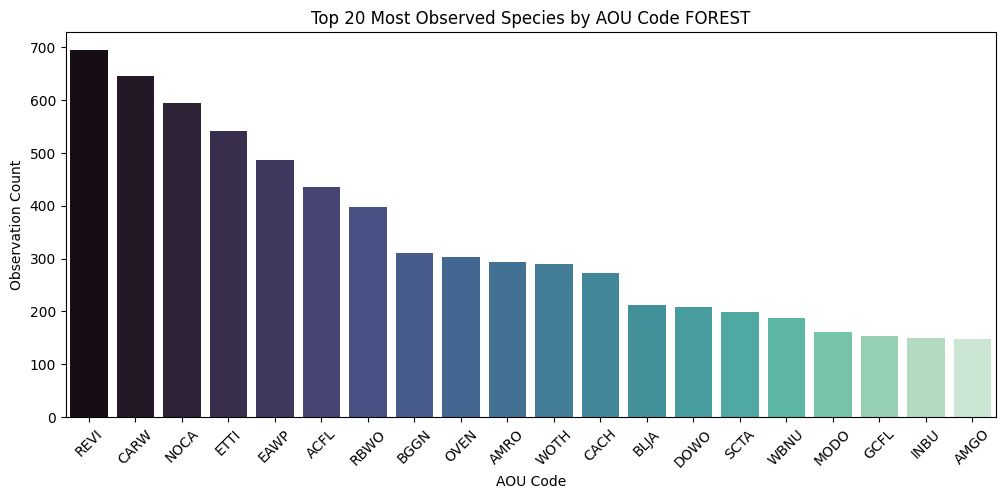

In [52]:

# Count the occurrences of each AOU Code
aou_counts = F["AOU_Code"].value_counts().reset_index()
aou_counts.columns = ["AOU_Code", "Count"]

# Plot distribution of AOU Codes
plt.figure(figsize=(12, 5))
sns.barplot(data=aou_counts.head(20), x="AOU_Code", y="Count", palette="mako")
plt.title("Top 20 Most Observed Species by AOU Code FOREST")
plt.xlabel("AOU Code")
plt.ylabel("Observation Count")
plt.xticks(rotation=45)
plt.show()



C:\Users\keert\AppData\Local\Temp\ipykernel_17568\4025229733.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=aou_counts.head(20), x="AOU_Code", y="Count", palette="mako")


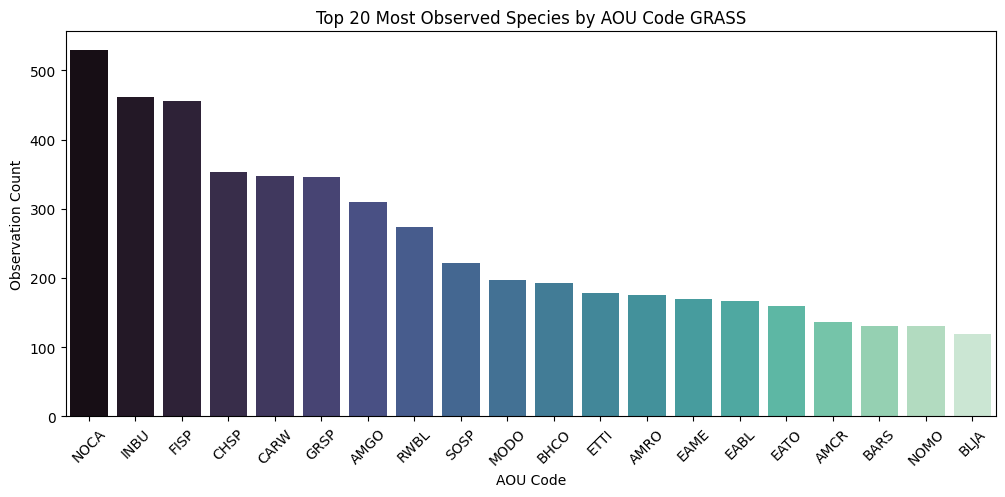

In [53]:

# Count the occurrences of each AOU Code
aou_counts = G["AOU_Code"].value_counts().reset_index()
aou_counts.columns = ["AOU_Code", "Count"]

# Plot distribution of AOU Codes
plt.figure(figsize=(12, 5))
sns.barplot(data=aou_counts.head(20), x="AOU_Code", y="Count", palette="mako")
plt.title("Top 20 Most Observed Species by AOU Code GRASS")
plt.xlabel("AOU Code")
plt.ylabel("Observation Count")
plt.xticks(rotation=45)
plt.show()


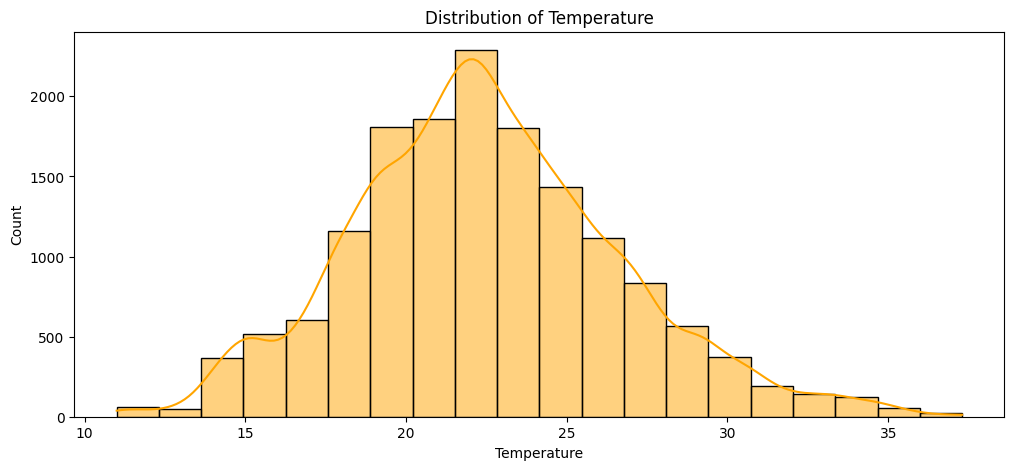

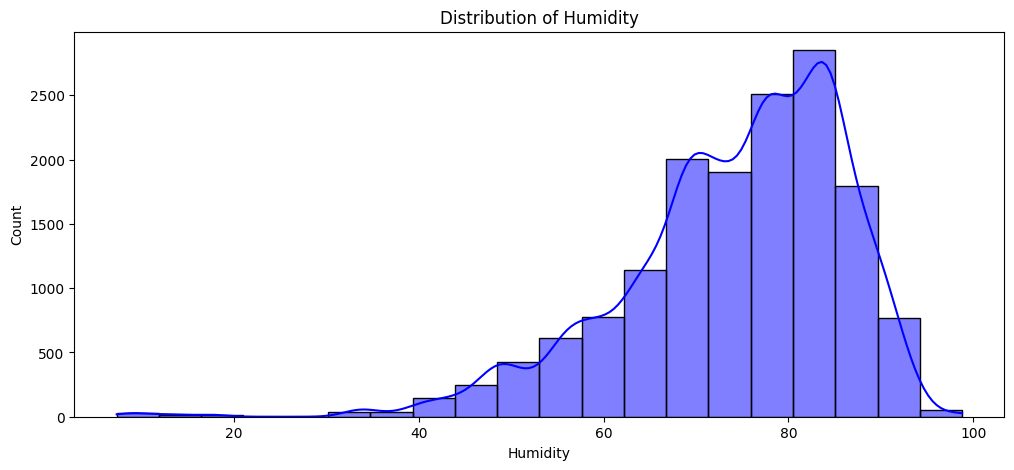

C:\Users\keert\AppData\Local\Temp\ipykernel_17568\1228809220.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Sky", order=df["Sky"].value_counts().index, palette="coolwarm")


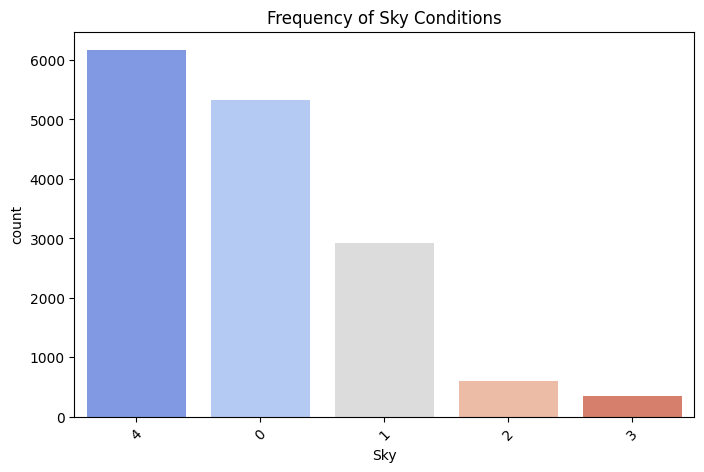

C:\Users\keert\AppData\Local\Temp\ipykernel_17568\1228809220.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Wind", order=df["Wind"].value_counts().index, palette="viridis")


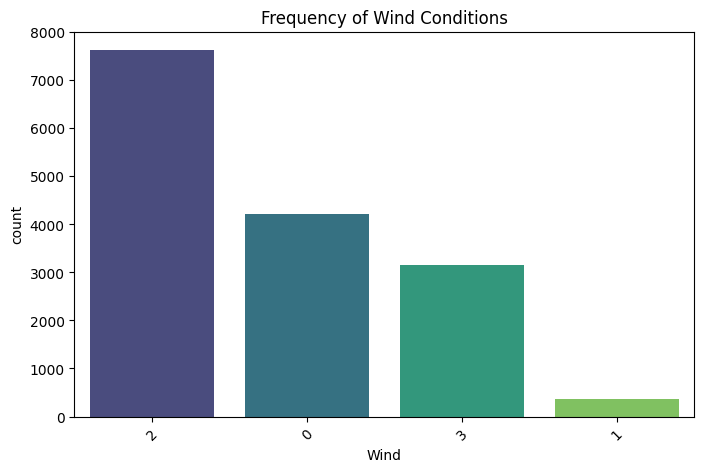

In [34]:

df = pd.concat([F, G], ignore_index=True)

# Convert categorical weather conditions to proper types
df['Sky'] = df['Sky'].astype(str)
df['Wind'] = df['Wind'].astype(str)

### Univariate Analysis ###
plt.figure(figsize=(12, 5))
sns.histplot(df['Temperature'], bins=20, kde=True, color='orange')
plt.title("Distribution of Temperature")
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(df['Humidity'], bins=20, kde=True, color='blue')
plt.title("Distribution of Humidity")
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Sky", order=df["Sky"].value_counts().index, palette="coolwarm")
plt.title("Frequency of Sky Conditions")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Wind", order=df["Wind"].value_counts().index, palette="viridis")
plt.title("Frequency of Wind Conditions")
plt.xticks(rotation=45)
plt.show()